In [1]:
import numpy as np
from scipy.linalg import solve

# Coefficient matrix A
A = np.array([[7, 2],
              [4, 5]])

# Right-hand side vector B
B = np.array([8, 10])

# Solve the system of equations
solution = solve(A, B)
solution


array([0.74074074, 1.40740741])

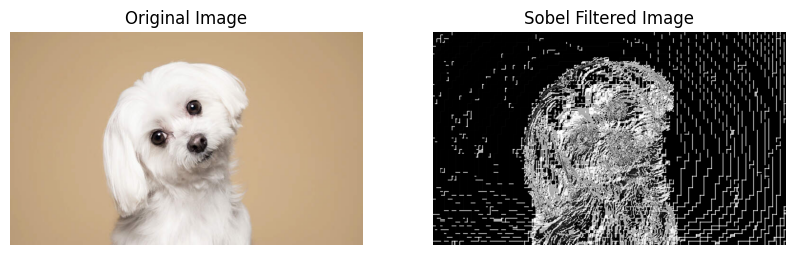

In [4]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from scipy import ndimage

# Load the image from the URL
url = "https://github.com/AnudipAE/DANLC/blob/master/dog.jpg?raw=true"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Convert image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

# Apply Sobel filter along the X and Y axes
sobel_x = ndimage.sobel(image_array, axis=0)  # horizontal edges
sobel_y = ndimage.sobel(image_array, axis=1)  # vertical edges

# Calculate the magnitude of the gradient
sobel_combined = np.hypot(sobel_x, sobel_y)

# Normalize the magnitude to the range [0, 255]
sobel_combined = (sobel_combined / sobel_combined.max()) * 255

# Convert the Sobel result to an image
sobel_image = Image.fromarray(sobel_combined.astype(np.uint8))

# Display the original and Sobel-filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_image, cmap='gray')
plt.title("Sobel Filtered Image")
plt.axis('off')

plt.show()
